<a href="https://colab.research.google.com/github/FatahArumi329/Sentiment-YouTube-/blob/main/Ekstraksi_Fitur_Teks_Analisis_Media_Sosial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Sastrawi
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 58.2 MB/s eta 0:00:00


In [ ]:
## Import Pustaka Yang Dibutuhkan
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.preprocessing import MultiLabelBinarizer #Pustaka untuk One Hot Encoding
#Pustaka untuk BoW, N-grams, TF-IDF
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
#Tambahan untuk TF-IDF
from math import log10
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
#Pustaka untuk Word2Vec
from gensim.models import Word2Vec



In [ ]:
nltk.download('stopwords')

# Membaca data
df = pd.read_csv("youtube_comment-100.csv")
df


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,publishedAt,authorDisplayName,textDisplay,likeCount
0,2025-10-30T05:20:40Z,@rujalijali3653,Mundur,0
1,2025-10-28T04:51:47Z,@susilohadiwonosobo9156,"Anies, Ferry 🤮🤮🤮💩💩💩💩🤬🤬🤬🐷🐷💔💔👺👺👺🇵🇱🇵🇱🇵🇱🇵🇱 2029 👎👎...",0
2,2025-10-27T17:40:52Z,@JohanSitorus-z2h,"Suarakan bang, Erick Thohir telah melakukan ...",0
3,2025-10-27T02:32:59Z,@mangasimarpaung978,Pemerintah menindas Olahraga Indonesia. <br>Ma...,1
4,2025-10-25T17:22:20Z,@PresidentOfGamers,"Sudah hampir setahun, saya masih patah hati ST...",0
...,...,...,...,...
95,2025-10-14T15:11:42Z,@O-Project,Federasi BANGSAT krn isinya orang2 BANGSAT. <b...,0
96,2025-10-14T14:44:14Z,@rubenzeconis5808,Coach kluivert kurang experience di sepakbola...,0
97,2025-10-14T14:43:57Z,@ferwintazen6144,Erick Tohir harus mundur secara ksatria dia yg...,0
98,2025-10-14T14:33:46Z,@Fikry25,Petrik mundur erik mundur ganti ama nurdin hal...,0


In [ ]:
# --- PREPROCESSING ---
# 1. Ambil kolom textDisplay
texts = df['textDisplay'].astype(str)

# 2. Hapus HTML tag dan karakter aneh
def clean_text(text):
    text = re.sub(r'<.*?>', ' ', text)  # hapus HTML tag
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)  # hapus karakter non huruf
    text = text.lower()  # ubah ke huruf kecil
    return text

texts = texts.apply(clean_text)

# 3. Hapus stopwords bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))
texts = texts.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# 4. Stemming (mengembalikan kata ke bentuk dasar)
factory = StemmerFactory()
stemmer = factory.create_stemmer()
texts = texts.apply(lambda x: stemmer.stem(x))

In [ ]:
texts.to_csv('hasil_preprocessing.csv', index=False)

In [ ]:
texts

,textDisplay
0,mundur
1,anies ferry
2,suara bang erick thohir jahat atur komposisi m...
3,perintah tindas olahraga indonesia masyarakat ...
4,tahun patah hati sty pecat syukur sisa hidup t...
...,...
95,federasi bangsat krn isi orang bangsat pk lati...
96,coach kluivert experience sepakbola asia bang ...
97,erick tohir mundur ksatria yg bertanggungjawab...
98,trik mundur erik mundur ganti ama nurdin halid...


# **One Hot Encoding**

In [ ]:
# --- Membentuk CORPUS ---
corpus = texts.tolist()

# --- Tokenisasi untuk One Hot Encoding ---
tokenized_corpus = [text.split() for text in corpus]

# --- Vocabulary (daftar unik semua kata) ---
vocab = sorted(set([word for doc in tokenized_corpus for word in doc]))

# --- One Hot Encoding menggunakan MultiLabelBinarizer ---
mlb = MultiLabelBinarizer()
onehot_encoded = mlb.fit_transform(tokenized_corpus)

df_onehot = pd.DataFrame(onehot_encoded, columns=mlb.classes_)

# --- Tampilkan hasil ---
print("=== Contoh CORPUS (5 komentar pertama) ===")
for i, doc in enumerate(corpus[:5]):
    print(f"{i+1}. {doc}\n")

print("=== Jumlah kata unik (Vocabulary size):", len(vocab), "===")
print("=== 50 kata pertama dari Vocabulary ===")
print(vocab[:50])

print("\n=== Contoh representasi One-Hot (5 dokumen pertama) ===")
print(df_onehot.head())

=== Contoh CORPUS (5 komentar pertama) ===
1. mundur

2. anies ferry

3. suara bang erick thohir jahat atur komposisi main gonta ganti formasi sesuai nya akibat pecat sty turut ingin hancur mimpi cinta sepak bola salah

4. perintah tindas olahraga indonesia masyarakat olahraga indonesia kog diam aja lawan diam tolol

5. tahun patah hati sty pecat syukur sisa hidup timnas yg harap kalah lawan kalah lawan bantai

=== Jumlah kata unik (Vocabulary size): 984 ===
=== 50 kata pertama dari Vocabulary ===
['aahhh', 'abang', 'acara', 'adil', 'adu', 'agenda', 'agregat', 'ah', 'ahli', 'ahzab', 'aj', 'aja', 'ajak', 'ajar', 'aju', 'akademi', 'akalin', 'akar', 'akibat', 'akses', 'aktif', 'aktor', 'aku', 'al', 'alaikum', 'alas', 'alat', 'alegri', 'alex', 'allah', 'alur', 'ama', 'amal', 'aman', 'ambil', 'amp', 'ampe', 'ampun', 'an', 'anak', 'ancur', 'andai', 'andal', 'ang', 'anggap', 'anies', 'anjir', 'anomali', 'anti', 'antimafia']

=== Contoh representasi One-Hot (5 dokumen pertama) ===
   aahhh  ab

## **Bag of Words (BoW)**

In [ ]:
# --- BENTUK CORPUS ---
corpus = texts.tolist()

# --- BAG OF WORDS ---
# Buat vectorizer BoW
vectorizer = CountVectorizer()

# Fit & transform corpus ke representasi BoW
X_bow = vectorizer.fit_transform(corpus)

# Ambil vocabulary
vocab = vectorizer.get_feature_names_out()

# --- SORTING VOCABULARY ---
# Secara default sklearn sudah mengurutkan vocabulary secara alfabetis,
# tapi kita bisa pastikan dengan manual sorting:
vocab_sorted = sorted(vocab)

# Jika ingin urut berdasarkan frekuensi (descending):
word_counts = X_bow.toarray().sum(axis=0)
vocab_freq_sorted = [w for _, w in sorted(zip(word_counts, vocab), reverse=True)]

# --- Buat DataFrame hasil BoW dengan vocabulary terurut alfabetis ---
df_bow = pd.DataFrame(X_bow.toarray(), columns=vocab_sorted)

# --- Tampilkan hasil ---
print("=== Contoh CORPUS (5 komentar pertama) ===")
for i, doc in enumerate(corpus[:5]):
    print(f"{i+1}. {doc}\n")

print("=== Jumlah kata unik (Vocabulary size):", len(vocab_sorted), "===")
print("=== 50 kata pertama (alphabetical) ===")
print(vocab_sorted[:50])

print("\n=== 20 kata paling sering muncul ===")
for w in vocab_freq_sorted[:20]:
    print(w)

print("\n=== Contoh Representasi Bag of Words (5 dokumen pertama) ===")
print(df_bow.head())

=== Contoh CORPUS (5 komentar pertama) ===
1. mundur

2. anies ferry

3. suara bang erick thohir jahat atur komposisi main gonta ganti formasi sesuai nya akibat pecat sty turut ingin hancur mimpi cinta sepak bola salah

4. perintah tindas olahraga indonesia masyarakat olahraga indonesia kog diam aja lawan diam tolol

5. tahun patah hati sty pecat syukur sisa hidup timnas yg harap kalah lawan kalah lawan bantai

=== Jumlah kata unik (Vocabulary size): 978 ===
=== 50 kata pertama (alphabetical) ===
['aahhh', 'abang', 'acara', 'adil', 'adu', 'agenda', 'agregat', 'ah', 'ahli', 'ahzab', 'aj', 'aja', 'ajak', 'ajar', 'aju', 'akademi', 'akalin', 'akar', 'akibat', 'akses', 'aktif', 'aktor', 'aku', 'al', 'alaikum', 'alas', 'alat', 'alegri', 'alex', 'allah', 'alur', 'ama', 'amal', 'aman', 'ambil', 'amp', 'ampe', 'ampun', 'an', 'anak', 'ancur', 'andai', 'andal', 'ang', 'anggap', 'anies', 'anjir', 'anomali', 'anti', 'antimafia']

=== 20 kata paling sering muncul ===
pssi
timnas
yg
latih
sty
indones

## **Bag of N-grams**

=== JUMLAH BIGRAM UNIK: 1915 ===
=== 30 BIGRAM PERTAMA ===
['aahhh taiklah' 'acara podcast' 'adil sidang' 'adu lapor' 'agenda erik'
 'agregat gol' 'ah jg' 'ahli integritas' 'aj tuh' 'aja akalin' 'aja ampe'
 'aja butuh' 'aja ga' 'aja lawan' 'aja sedih' 'aja yg' 'ajak diplomasi'
 'ajar anti' 'ajar negara' 'aju publik' 'akademi klub' 'akalin petinggi'
 'akar puluh' 'akibat fatal' 'akibat pecat' 'akibat sali' 'akses pegang'
 'akses sponsor' 'aktif bikin' 'aktor lakon']

=== Contoh Representasi BIGRAM ===
   aahhh taiklah  acara podcast  adil sidang  adu lapor  agenda erik  \
0              0              0            0          0            0   
1              0              0            0          0            0   
2              0              0            0          0            0   
3              0              0            0          0            0   
4              0              0            0          0            0   

   agregat gol  ah jg  ahli integritas  aj tuh  aja akalin  .

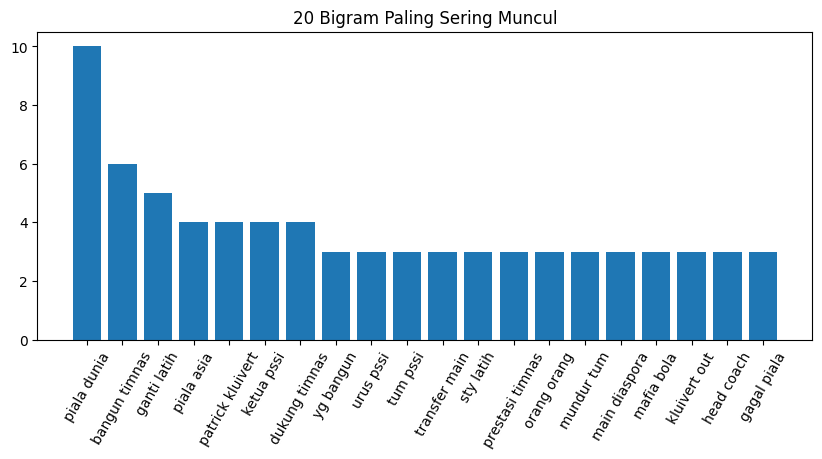

=== JUMLAH TRIGRAM UNIK: 1945 ===
=== 30 TRIGRAM PERTAMA ===
['aahhh taiklah dah' 'acara podcast trifellas' 'adil sidang kode'
 'adu lapor curang' 'agenda erik tohir' 'agregat gol situ' 'ah jg langgan'
 'ahli integritas wenang' 'aj tuh tau' 'aja akalin petinggi'
 'aja ampe heran' 'aja butuh gmn' 'aja ga sabar' 'aja lawan diam'
 'aja sedih ya' 'aja yg mohon' 'aja yg ringan' 'ajak diplomasi reform'
 'ajar anti match' 'ajar negara pssi' 'aju publik awas'
 'akademi klub wajib' 'akalin petinggi tentu' 'akar puluh langkah'
 'akibat fatal model' 'akibat pecat sty' 'akibat sali buat'
 'akses pegang figur' 'akses sponsor jaring' 'aktif bikin konten']

=== Contoh Representasi TRIGRAM ===
   aahhh taiklah dah  acara podcast trifellas  adil sidang kode  \
0                  0                        0                 0   
1                  0                        0                 0   
2                  0                        0                 0   
3                  0                        0

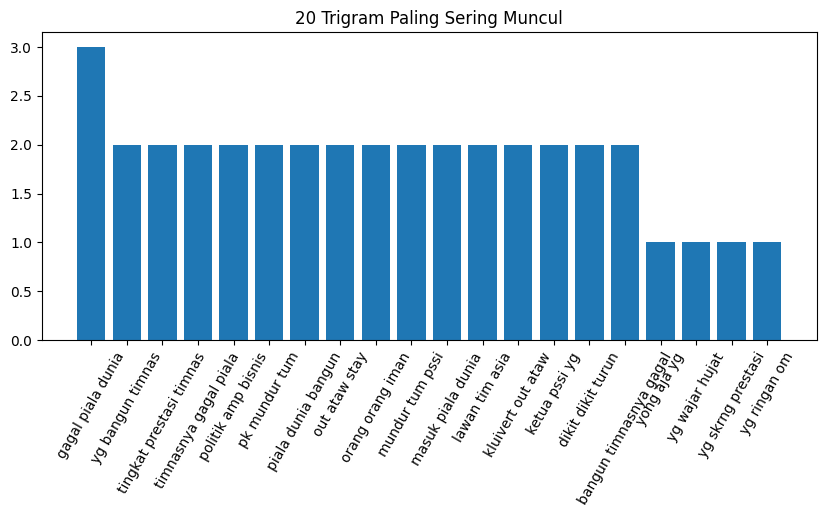

In [ ]:
# --- BENTUK CORPUS ---
corpus = texts.tolist()

# ================================================================
#                 BAG OF N-GRAMS: BIGRAM (N=2)
# ================================================================
vectorizer_bigram = CountVectorizer(ngram_range=(2, 2))
X_bigram = vectorizer_bigram.fit_transform(corpus)

vocab_bigram = vectorizer_bigram.get_feature_names_out()
df_bigram = pd.DataFrame(X_bigram.toarray(), columns=vocab_bigram)

print("=== JUMLAH BIGRAM UNIK:", len(vocab_bigram), "===")
print("=== 30 BIGRAM PERTAMA ===")
print(vocab_bigram[:30])

# Lihat 5 dokumen pertama
print("\n=== Contoh Representasi BIGRAM ===")
print(df_bigram.head())

# Frekuensi bigram teratas
bigram_freq = X_bigram.toarray().sum(axis=0)
top_bigram = sorted(zip(bigram_freq, vocab_bigram), reverse=True)[:20]

plt.figure(figsize=(10,4))
plt.bar([b for _, b in top_bigram], [f for f, _ in top_bigram])
plt.xticks(rotation=60)
plt.title("20 Bigram Paling Sering Muncul")
plt.show()

# ================================================================
#                 BAG OF N-GRAMS: TRIGRAM (N=3)
# ================================================================
vectorizer_trigram = CountVectorizer(ngram_range=(3, 3))
X_trigram = vectorizer_trigram.fit_transform(corpus)

vocab_trigram = vectorizer_trigram.get_feature_names_out()
df_trigram = pd.DataFrame(X_trigram.toarray(), columns=vocab_trigram)

print("=== JUMLAH TRIGRAM UNIK:", len(vocab_trigram), "===")
print("=== 30 TRIGRAM PERTAMA ===")
print(vocab_trigram[:30])

# Lihat 5 dokumen pertama
print("\n=== Contoh Representasi TRIGRAM ===")
print(df_trigram.head())

# Frekuensi trigram teratas
trigram_freq = X_trigram.toarray().sum(axis=0)
top_trigram = sorted(zip(trigram_freq, vocab_trigram), reverse=True)[:20]

plt.figure(figsize=(10,4))
plt.bar([b for _, b in top_trigram], [f for f, _ in top_trigram])
plt.xticks(rotation=60)
plt.title("20 Trigram Paling Sering Muncul")
plt.show()

## **TF-IDF**

In [ ]:
# ambil 5 dokumen pertama agar output mudah dibaca
corpus = texts[:5].tolist()

print("=== Contoh 5 Dokumen (setelah preprocessing) ===")
for i, doc in enumerate(corpus, 1):
    print(f"{i}. {doc}\n")

# ================================================================
# 1. Hitung FREKUENSI KATA di setiap dokumen
# ================================================================
doc_word_counts = [Counter(doc.split()) for doc in corpus]

print("\n=== FREKUENSI KATA per DOKUMEN ===")
for i, counts in enumerate(doc_word_counts, 1):
    print(f"Dokumen {i}: {dict(counts)}")

# ================================================================
# 2. Hitung TERM FREQUENCY (TF)
# TF = (jumlah kemunculan kata di dokumen) / (total kata di dokumen)
# ================================================================
tf = []
for counts in doc_word_counts:
    total_terms = sum(counts.values())
    tf_doc = {word: count / total_terms for word, count in counts.items()}
    tf.append(tf_doc)

print("\n=== TERM FREQUENCY (TF) ===")
for i, tf_doc in enumerate(tf, 1):
    print(f"Dokumen {i}: {tf_doc}")

# ================================================================
# 3. Hitung FREKUENSI DOKUMEN untuk setiap kata (DF)
# DF = berapa banyak dokumen yang mengandung kata tsb
# ================================================================
all_words = set([word for doc in doc_word_counts for word in doc])
df_counts = {word: sum(1 for doc in doc_word_counts if word in doc) for word in all_words}

print("\n=== FREKUENSI DOKUMEN (DF) ===")
print(df_counts)

# ================================================================
# 4. Hitung INVERSE DOCUMENT FREQUENCY (IDF)
# IDF = log10( N / DF )
# ================================================================
N = len(corpus)
idf = {word: log10(N / df_counts[word]) for word in df_counts}

print("\n=== NILAI INVERSE DOCUMENT FREQUENCY (IDF) ===")
print(idf)

# ================================================================
# 5. Hitung TF-IDF = TF * IDF
# ================================================================
tfidf = []
for tf_doc in tf:
    tfidf_doc = {word: tf_doc[word] * idf[word] for word in tf_doc}
    tfidf.append(tfidf_doc)

print("\n=== NILAI TF-IDF ===")
for i, tfidf_doc in enumerate(tfidf, 1):
    print(f"Dokumen {i}: {tfidf_doc}")

# ================================================================
# 6. Buat DataFrame TF-IDF untuk visualisasi
# ================================================================
df_tfidf = pd.DataFrame(tfidf).fillna(0)
df_tfidf = df_tfidf[[col for col in sorted(df_tfidf.columns)]]
print("\n=== REPRESENTASI MATRIX TF-IDF ===")
print(df_tfidf.head())

=== Contoh 5 Dokumen (setelah preprocessing) ===
1. mundur

2. anies ferry

3. suara bang erick thohir jahat atur komposisi main gonta ganti formasi sesuai nya akibat pecat sty turut ingin hancur mimpi cinta sepak bola salah

4. perintah tindas olahraga indonesia masyarakat olahraga indonesia kog diam aja lawan diam tolol

5. tahun patah hati sty pecat syukur sisa hidup timnas yg harap kalah lawan kalah lawan bantai


=== FREKUENSI KATA per DOKUMEN ===
Dokumen 1: {'mundur': 1}
Dokumen 2: {'anies': 1, 'ferry': 1}
Dokumen 3: {'suara': 1, 'bang': 1, 'erick': 1, 'thohir': 1, 'jahat': 1, 'atur': 1, 'komposisi': 1, 'main': 1, 'gonta': 1, 'ganti': 1, 'formasi': 1, 'sesuai': 1, 'nya': 1, 'akibat': 1, 'pecat': 1, 'sty': 1, 'turut': 1, 'ingin': 1, 'hancur': 1, 'mimpi': 1, 'cinta': 1, 'sepak': 1, 'bola': 1, 'salah': 1}
Dokumen 4: {'perintah': 1, 'tindas': 1, 'olahraga': 2, 'indonesia': 2, 'masyarakat': 1, 'kog': 1, 'diam': 2, 'aja': 1, 'lawan': 1, 'tolol': 1}
Dokumen 5: {'tahun': 1, 'patah': 1, '

## **Word2Vec**

In [ ]:
# Tokenisasi ulang untuk Word2Vec
sentences = [text.split() for text in texts]

# Latih model Word2Vec CBOW
model_w2v = Word2Vec(sentences, vector_size=100, window=5, min_count=2, sg=0, workers=4)

# Contoh: ambil vektor dari beberapa kata
words = list(model_w2v.wv.index_to_key)[:10]
for word in words:
    print(f"{word}: {model_w2v.wv[word][:5]}")  # tampilkan 5 dimensi pertama

pssi: [-0.00118256  0.00111007  0.00549125  0.00959362 -0.00917102]
timnas: [-0.00922727  0.00477928  0.00594678  0.00646459  0.00799414]
yg: [-0.00018334  0.00376068 -0.00654473 -0.00104779  0.00785904]
latih: [-8.6960252e-03  1.0027462e-02 -4.7088288e-05 -1.6297617e-03
  4.9048872e-03]
sty: [-0.00762004  0.00189183 -0.00693189 -0.00188904  0.00389358]
indonesia: [-0.00916832  0.00292141 -0.00048912 -0.00904925 -0.00910209]
main: [ 7.6716752e-03 -3.6478674e-03 -6.7074923e-04  1.4769649e-03
  6.7159825e-05]
amp: [ 0.00771576 -0.00374526  0.00923973  0.00883158 -0.00441938]
quot: [-0.00996147  0.00965277  0.00439408  0.00966044  0.0067754 ]
ganti: [-0.00548086 -0.00605691 -0.00745346  0.00888053 -0.0018138 ]


In [ ]:
# Tokenisasi ulang untuk Word2Vec
sentences = [text.split() for text in texts]

# Latih model Word2Vec Skip Gram
model_w2v = Word2Vec(sentences, vector_size=100, window=5, min_count=2, sg=1, workers=4)

# Contoh: ambil vektor dari beberapa kata
words = list(model_w2v.wv.index_to_key)[:10]
for word in words:
    print(f"{word}: {model_w2v.wv[word][:5]}")  # tampilkan 5 dimensi pertama

pssi: [-0.00854379  0.00855181  0.00717347  0.01864194 -0.01038255]
timnas: [-0.01773347  0.01502189  0.00830174  0.01633416  0.00771095]
yg: [-0.00550018  0.00963987 -0.00592877  0.00521153  0.00711769]
latih: [-0.01363426  0.01605769  0.00067238  0.00464534  0.00478033]
sty: [-0.01279112  0.00754036 -0.00584876  0.00426147  0.00362467]
indonesia: [-0.01423036  0.00884855  0.00072223 -0.00230494 -0.00964445]
main: [ 0.00191091  0.00288335  0.00045639  0.00901354 -0.00041264]
amp: [ 0.00223067  0.00240376  0.01016564  0.0163037  -0.00552429]
quot: [-0.01546592  0.01538807  0.00515913  0.01515513  0.00621565]
ganti: [-0.01025964  0.00015405 -0.00724358  0.01438313 -0.00216597]
